In [27]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv(r'Data\market_basket.csv')

In [13]:
data

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...,...
131701,131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46
131702,131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50
131703,131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19
131704,131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57


In [14]:
data = data.drop(['Unnamed: 0'], axis=1)

In [15]:
data.dtypes

Date               object
Customer_ID         int64
Transaction_ID      int64
SKU_Category       object
SKU                object
Quantity          float64
Sales_Amount      float64
dtype: object

In [16]:
data.describe()

,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706.000000,131706.000000,131706.000000
mean,12386.450367,32389.604187,1.485311,11.981524
std,6086.447552,18709.901238,3.872667,19.359699
min,1.000000,1.000000,0.010000,0.020000
25%,7349.000000,16134.000000,1.000000,4.230000
50%,13496.000000,32620.000000,1.000000,6.920000
75%,17306.000000,48548.000000,1.000000,12.330000
max,22625.000000,64682.000000,400.000000,707.730000


In [17]:
data.describe(include=['O'])


,Date,SKU_Category,SKU
count,131706,131706,131706
unique,363,187,5242
top,23/09/2016,N8U,UNJKW
freq,638,10913,2007


In [18]:
data['Date']= pd.to_datetime(data['Date'])
data['Date'].value_counts()

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\p

2016-09-23    638
2016-12-15    614
2016-09-22    606
2016-05-13    602
2016-12-16    594
             ... 
2016-07-31    128
2016-03-01    111
2016-08-28    107
2016-12-24    100
2016-03-28     73
Name: Date, Length: 363, dtype: int64

In [19]:
data['Transaction_ID'].nunique()

64682

In [20]:
data['Customer_ID'].nunique()

22625

In [21]:
TransCount = data.groupby(['Transaction_ID'])['SKU'].count().sort_values(ascending=True)

In [22]:
dict_transCount = {}

In [23]:
for i in TransCount.unique():
    dict_transCount[i] = 0

In [24]:
for j in TransCount:
    dict_transCount[j] = dict_transCount[j] + 1

In [25]:
dict_transCount

{1: 32906,
 2: 16845,
 3: 6802,
 4: 3478,
 5: 1851,
 6: 1036,
 7: 646,
 8: 426,
 9: 254,
 10: 167,
 11: 94,
 12: 64,
 13: 52,
 14: 23,
 15: 16,
 16: 4,
 17: 6,
 18: 4,
 19: 5,
 20: 1,
 21: 2}

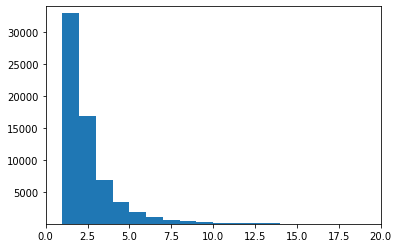

In [28]:
#dataset
fig, ax = plt.subplots()
ax.hist(TransCount, bins=20)
ax.set(xlim=(0,20),ylim=(1,34000))
plt.show()

In [30]:
dfilter = data.groupby(['SKU'])['Quantity'].sum().reset_index(name='Quantity')
# filter by quantity of sales greater than 10
dfilter = dfilter[dfilter['Quantity'] > 10]
dfilter

,SKU,Quantity
1,00OK1,18.0
2,0121I,31.0
3,01IEO,43.0
6,01V7M,45.0
9,03C6L,36.0
...,...,...
5230,ZVTO4,236.0
5231,ZWFSY,862.0
5233,ZWWB5,11.0
5236,ZYF2U,14.0


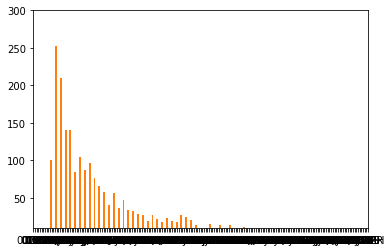

In [31]:
fig, ax = plt.subplots()
ax.hist(dfilter, bins=2000, linewidth=0.1)
ax.set(xlim=(0,200),ylim=(10,300))
plt.show()

In [33]:
basket = (data.groupby(['Customer_ID', 'SKU'])['Quantity']
         .sum().unstack().reset_index().fillna(0)
         .set_index('Customer_ID'))
basket

SKU,00GVC,00OK1,0121I,01IEO,01IQT,01L05,01V7M,01XVY,029WA,03C6L,...,ZWNCK,ZWWB5,ZX2UM,ZY9N9,ZYF2U,ZZ2AO,ZZDW7,ZZM1A,ZZNC5,ZZX6K
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
def encode_units(x):
    if x <= 0:
        return False
    if x >= 1:
        return True
    else: 
        return False

In [35]:
basket = basket.applymap(encode_units)

In [36]:
basket

SKU,00GVC,00OK1,0121I,01IEO,01IQT,01L05,01V7M,01XVY,029WA,03C6L,...,ZWNCK,ZWWB5,ZX2UM,ZY9N9,ZYF2U,ZZ2AO,ZZDW7,ZZM1A,ZZNC5,ZZX6K
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22621,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22622,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22623,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df_itemset = apriori(basket, min_support=0.002, use_colnames=True)

In [38]:
df_itemset

,support,itemsets
0,0.002122,(096VW)
1,0.003006,(09LL9)
2,0.002873,(0AEJH)
3,0.002387,(0B8JX)
4,0.002740,(0D3EZ)
...,...,...
583,0.004773,"(M6J9W, UNJKW)"
584,0.004155,"(OV1P9, UNJKW)"
585,0.002298,"(TL4WZ, UNJKW)"
586,0.002740,"(UQC6F, UNJKW)"


In [41]:
from mlxtend.frequent_patterns import association_rules
association_rules(df_itemset, metric="confidence", min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(6V2Q8),(3483Q),0.005613,0.006144,0.002033,0.362205,58.955985,0.001999,1.558269
1,(3483Q),(6V2Q8),0.006144,0.005613,0.002033,0.330935,58.955985,0.001999,1.486234
2,(5O2CO),(3QNEE),0.002785,0.003624,0.002166,0.777778,214.600271,0.002156,4.483691
3,(3QNEE),(5O2CO),0.003624,0.002785,0.002166,0.597561,214.600271,0.002156,2.477929
4,(VWUC7),(A59HR),0.005039,0.020906,0.002254,0.447368,21.398965,0.002149,1.771694


In [44]:
rules = association_rules(df_itemset, metric="lift", min_threshold=1.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(6V2Q8),(3483Q),0.005613,0.006144,0.002033,0.362205,58.955985,0.001999,1.558269
1,(3483Q),(6V2Q8),0.006144,0.005613,0.002033,0.330935,58.955985,0.001999,1.486234
2,(5O2CO),(3QNEE),0.002785,0.003624,0.002166,0.777778,214.600271,0.002156,4.483691
3,(3QNEE),(5O2CO),0.003624,0.002785,0.002166,0.597561,214.600271,0.002156,2.477929
4,(3SZO0),(UNJKW),0.014453,0.072840,0.002431,0.168196,2.309119,0.001378,1.114637
...,...,...,...,...,...,...,...,...,...
83,(UNJKW),(TL4WZ),0.072840,0.018298,0.002298,0.031553,1.724386,0.000965,1.013687
84,(UQC6F),(UNJKW),0.014541,0.072840,0.002740,0.188450,2.587183,0.001681,1.142456
85,(UNJKW),(UQC6F),0.072840,0.014541,0.002740,0.037621,2.587183,0.001681,1.023982
86,(W1ZMG),(UNJKW),0.018829,0.072840,0.003006,0.159624,2.191446,0.001634,1.103269


In [95]:
rules['support'].sort_values(ascending=False)

53    0.006630
52    0.006630
79    0.004773
78    0.004773
81    0.004155
        ...   
33    0.002033
1     0.002033
41    0.002033
40    0.002033
0     0.002033
Name: support, Length: 88, dtype: float64

In [96]:
#sản phẩm support lớn nhất:
rules[['antecedents','support']].iloc[53]

antecedents    (UNJKW)
support        0.00663
Name: 53, dtype: object

In [97]:
#sản phẩm này đi kèm với:
for row in rules.iterrows():
    if "UNJKW" in row[1][0]:
        print(row)

(5, antecedents            (UNJKW)
consequents            (3SZO0)
antecedent support     0.07284
consequent support    0.014453
support               0.002431
confidence            0.033374
lift                  2.309119
leverage              0.001378
conviction            1.019574
Name: 5, dtype: object)
(11, antecedents            (UNJKW)
consequents            (4X8P4)
antecedent support     0.07284
consequent support    0.017193
support               0.002387
confidence            0.032767
lift                  1.905792
leverage              0.001134
conviction            1.016101
Name: 11, dtype: object)
(15, antecedents            (UNJKW)
consequents            (51OBI)
antecedent support     0.07284
consequent support    0.016044
support               0.003182
confidence            0.043689
lift                   2.72306
leverage              0.002014
conviction            1.028908
Name: 15, dtype: object)
(19, antecedents            (UNJKW)
consequents            (536VK)
antecede

In [47]:
support=rules['support'].values
confidence=rules['confidence'].values
lift = rules['lift'].values

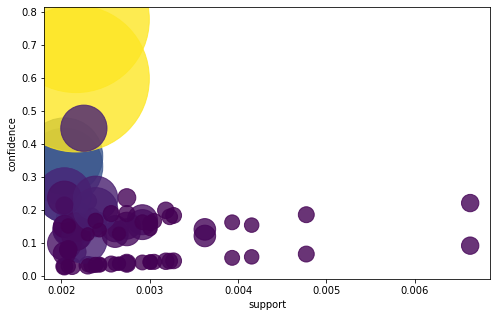

In [48]:
plt.figure(figsize=(8,5))
plt.scatter(support, confidence, s= lift*100,alpha=0.8, c = lift)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [51]:
result = basket.apply(pd.value_counts).fillna(0)
result

SKU,00GVC,00OK1,0121I,01IEO,01IQT,01L05,01V7M,01XVY,029WA,03C6L,...,ZWNCK,ZWWB5,ZX2UM,ZY9N9,ZYF2U,ZZ2AO,ZZDW7,ZZM1A,ZZNC5,ZZX6K
False,22623,22610,22602,22591,22619,22619,22589,22624,22623,22594,...,22624,22620,22624,22622,22612,22624,22623,22601,22624,22624
True,2,15,23,34,6,6,36,1,2,31,...,1,5,1,3,13,1,2,24,1,1


In [52]:
df_true = result.iloc[1,:]
df_true[:10]

SKU
00GVC     2.0
00OK1    15.0
0121I    23.0
01IEO    34.0
01IQT     6.0
01L05     6.0
01V7M    36.0
01XVY     1.0
029WA     2.0
03C6L    31.0
Name: True, dtype: float64

In [53]:
x = df_true.sort_values(ascending=False)

In [79]:
fifteen_best_buy_products = x[:15]
fifteen_best_buy_products

SKU
UNJKW    1648.0
COWU2     681.0
OV1P9     613.0
M6J9W     584.0
CZUZX     550.0
E3PAN     478.0
A59HR     473.0
C6TXL     471.0
7GQRJ     437.0
W1ZMG     426.0
DMJ70     416.0
TL4WZ     414.0
EMJ1S     409.0
QGK3S     409.0
M4TM4     407.0
Name: True, dtype: float64

In [80]:
pos = np.arange(len(fifteen_best_buy_products.values))

Text(0.5, 1.0, 'fifteen products best buy')

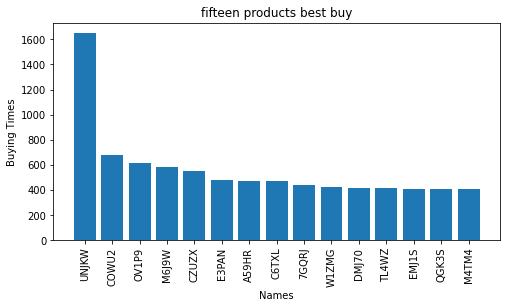

In [81]:
plt.figure(figsize=(8,4))
plt.bar(pos, fifteen_best_buy_products.values, align='center')
plt.xticks(pos, fifteen_best_buy_products.keys(), rotation='vertical')
plt.ylabel('Buying Times')
plt.xlabel('Names')
plt.title('fifteen products best buy')

In [88]:
y = df_true[df_true!=0].sort_values(ascending=True)

In [89]:
y

SKU
ZZX6K       1.0
K1LR5       1.0
K21XG       1.0
6DXCI       1.0
6DWA1       1.0
          ...  
CZUZX     550.0
M6J9W     584.0
OV1P9     613.0
COWU2     681.0
UNJKW    1648.0
Name: True, Length: 5228, dtype: float64

In [92]:
fifteen_lowest_buy_products = y[:15]
fifteen_lowest_buy_products

SKU
ZZX6K    1.0
K1LR5    1.0
K21XG    1.0
6DXCI    1.0
6DWA1    1.0
6DSTT    1.0
6DD6Z    1.0
K41YP    1.0
6EN6K    1.0
K4WZX    1.0
K77S1    1.0
K846V    1.0
KA2KS    1.0
KB3LD    1.0
6BX1S    1.0
Name: True, dtype: float64

In [93]:
pos = np.arange(len(fifteen_lowest_buy_products.values))

Text(0.5, 1.0, 'fifteen products lowest buy')

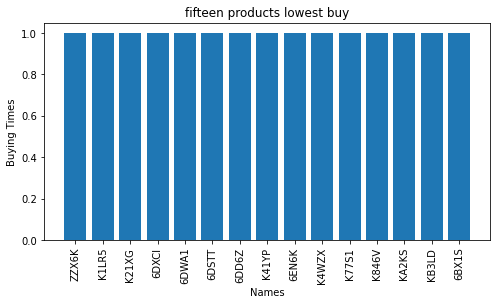

In [94]:
plt.figure(figsize=(8,4))
plt.bar(pos, fifteen_lowest_buy_products.values, align='center')
plt.xticks(pos, fifteen_lowest_buy_products.keys(), rotation='vertical')
plt.ylabel('Buying Times')
plt.xlabel('Names')
plt.title('fifteen products lowest buy')